In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\USER\Downloads\Add_sales_data_2018.csv')

In [3]:
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
data.shape

(205, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [8]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [10]:
data['Profit(in Thousands)'].unique()

array([4093.065, 4042.448, 4213.819, 4391.665, 4350.683, 4404.686,
       4418.709, 4470.775, 4425.005, 4446.441, 4411.775, 4435.571,
       4464.11 , 4434.805, 4379.901, 4152.066, 4175.677, 4326.782,
       4190.965, 4193.095, 4178.008, 4390.996, 4523.704, 4465.95 ,
       4435.174, 4436.321, 4451.999, 4453.773, 4416.136, 4482.183,
       4598.292, 4617.695, 4566.31 , 4513.6  , 4461.325, 4419.421,
       4435.816, 4480.363, 4486.38 , 4506.279, 4486.996, 4453.205,
       4432.864, 4672.391, 4648.627, 4606.34 , 4558.651, 4519.061,
       4599.49 , 4643.716, 4548.11 , 4477.226, 4494.144, 4605.783,
       4671.113, 4760.877, 4947.72 , 5071.736, 5133.766, 5190.814,
       5145.131, 5088.455, 5234.487, 5250.775, 5239.06 , 5075.858,
       5038.222, 5001.615, 5004.282, 5030.451, 4977.891, 4916.064,
       4890.723, 4936.12 , 5113.337, 5163.693, 5225.14 , 5187.445,
       5057.155, 5013.207, 5043.705, 5027.633, 5034.726, 4980.446,
       4925.861, 4923.127, 5015.536, 5058.14 , 4937.03 , 4898.

In [11]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

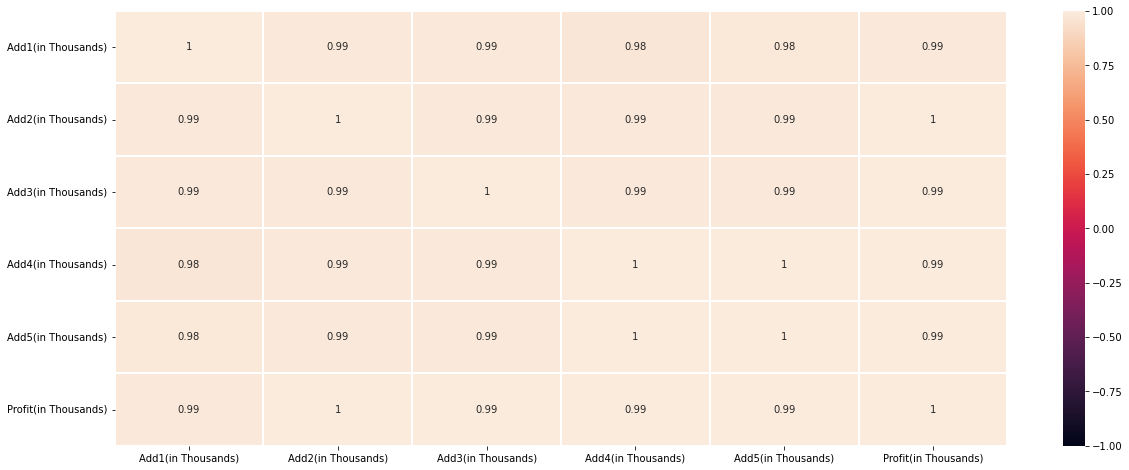

In [13]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmax=1,vmin=-1,annot=True,linewidth=0.2)

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [14]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [17]:
x=data[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
y=data['Profit(in Thousands)']

In [19]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=42,test_size=.25)

In [20]:
from sklearn import linear_model
lr=linear_model.LinearRegression() 

In [21]:
model=lr.fit(x_train,y_train)

In [22]:
predictions=model.predict(x_test)

In [23]:
print(y_test)

90     4887.296
173    5805.521
93     4705.198
5      4404.686
167    5465.277
         ...   
106    5430.790
14     4379.901
92     4763.690
179    6137.800
102    5453.240
Name: Profit(in Thousands), Length: 153, dtype: float64


In [24]:
print(predictions)

[4887.296 5805.521 4705.198 4404.686 5465.277 4947.72  5185.639 5225.14
 5111.806 5518.561 5910.98  5163.693 5866.196 4617.695 4464.11  4419.421
 5153.977 4432.864 5137.534 4915.682 5250.15  4477.226 5373.275 5245.14
 4453.205 5244.097 5057.155 5227.886 4451.999 5051.755 5374.105 5359.346
 4213.819 5187.445 4558.651 5167.878 5188.139 4923.127 5247.011 4435.816
 5378.379 5088.455 4523.704 4979.399 5767.839 4513.6   4435.571 5425.371
 5267.657 4418.709 4453.773 5172.76  5676.934 5245.324 4350.683 4566.31
 5577.15  5890.012 5397.739 5190.758 4411.775 5234.487 5318.1   5216.436
 5728.804 4093.065 5962.336 5972.337 4977.891 5565.444 5239.06  4648.627
 5107.437 4416.136 4486.996 5580.775 5238.366 4465.95  5078.636 5938.474
 5027.633 4506.279 5789.791 4519.061 4676.653 5312.74  4672.391 5163.322
 4391.665 5511.42  4605.783 4821.542 5903.253 5212.949 5917.925 4643.716
 5043.705 4461.325 4470.775 5511.087 4836.837 4980.446 5921.116 5861.83
 4898.776 4425.005 4434.805 5190.814 5858.34  4968.03  

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
print("MSE",mean_squared_error(y_test,predictions))

MSE 1.4394564581192394e-24


In [27]:
from sklearn.metrics import r2_score
r_sq=r2_score(y_test,predictions)
r_sq

1.0

In [28]:
print("Coefficients:",model.coef_)
print("Intercept:",model.intercept_)

Coefficients: [ 1.   12.38  3.5   1.    0.9 ]
Intercept: -2.7284841053187847e-12


# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

 Add1(in Thousands) 290 Add2(in Thousands) 312 Add3(in Thousands) 309 Add4(in Thousands) 298 Add5(in Thousands) 320 Things

In [29]:
predictions_2 = model.predict([[290, 312, 309, 298, 320]])
predictions_2

array([5820.06])

5820.06 is the predicted profit if they wish to spend the amounts 290,312,309,298,320 in each advertising companie